# An√°lisis exploratorio inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar datos ===
file_path = "datos/clinical_and_imaging_info.xlsx"
df = pd.read_excel(file_path, sheet_name="dataset_info")

C:\Users\usuario\AppData\Local\Temp\ipykernel_50272\1098527229.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
# === 2. Informaci√≥n general ===
print("Dimensiones del DataFrame:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")

print("Tipos de datos:")
print(df.dtypes.value_counts(), "\n")

print("Primeras filas:")
print(df.head(), "\n")

Dimensiones del DataFrame:
Filas: 1506, Columnas: 50

Tipos de datos:
float64    24
object     17
int64       9
Name: count, dtype: int64 

Primeras filas:
  patient_id dataset  bilateral_breast_cancer  multifocal_cancer nac_agent  \
0   DUKE_001    DUKE                        0                0.0       NaN   
1   DUKE_002    DUKE                        0                0.0       NaN   
2   DUKE_005    DUKE                        0                1.0       NaN   
3   DUKE_009    DUKE                        0                1.0       NaN   
4   DUKE_010    DUKE                        0                1.0       NaN   

   endocrine_therapy  anti_her2_neu_therapy  pcr  mastectomy_post_nac  \
0                0.0                    1.0  0.0                  0.0   
1                0.0                    0.0  0.0                  0.0   
2                0.0                    1.0  1.0                  1.0   
3                0.0                    0.0  1.0                  0.0   
4         

In [ ]:
# Ver n√∫mero total de pacientes √∫nicos
num_pacientes = df['patient_id'].nunique()
print(f"Total de pacientes: {num_pacientes}")

# Ver distribuci√≥n por dataset (DUKE, ISPY1, etc.)
pacientes_por_dataset = df['dataset'].value_counts()
print("\nDistribuci√≥n por dataset:")
print(pacientes_por_dataset)

Total de pacientes: 1506

Distribuci√≥n por dataset:
dataset
ISPY2    980
DUKE     291
ISPY1    171
NACT      64
Name: count, dtype: int64


In [ ]:
# === 3. Valores nulos ===
print("Porcentaje de nulos por columna:")
null_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(null_percent[null_percent > 0], "\n")

Porcentaje de nulos por columna:
oncotype_score           98.539177
breast_density           96.015936
days_to_metastasis       95.750332
patient_size             93.027888
nottingham_grade         87.250996
endocrine_therapy        80.743692
anti_her2_neu_therapy    80.743692
mastectomy_post_nac      76.826029
days_to_death            69.521912
pr                       66.135458
er                       66.135458
days_to_follow_up        65.670651
days_to_recurrence       65.272244
mammaprint               34.926959
nac_agent                30.677291
menopause                27.091633
acquisition_date         19.322709
weight                   16.533865
bmi_group                16.533865
multifocal_cancer        10.624170
acquisition_times         2.191235
window_center             2.191235
window_width              2.191235
tumor_subtype             1.726428
her2                      1.460823
hr                        1.062417
ethnicity                 1.062417
pcr                   

In [ ]:
# === 4. Separar por tipo de variable ===
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


print("Variables categ√≥ricas:", cat_cols, "\n")
print("Variables num√©ricas:", num_cols, "\n")

Variables categ√≥ricas: ['patient_id', 'dataset', 'nac_agent', 'nottingham_grade', 'tumor_subtype', 'menopause', 'ethnicity', 'bmi_group', 'breast_density', 'view', 'pixel_spacing', 'site', 'manufacturer', 'scanner_model', 'acquisition_times', 'acquisition_date', 'tcia_series_uid'] 

Variables num√©ricas: ['bilateral_breast_cancer', 'multifocal_cancer', 'endocrine_therapy', 'anti_her2_neu_therapy', 'pcr', 'mastectomy_post_nac', 'days_to_follow_up', 'days_to_recurrence', 'days_to_metastasis', 'days_to_death', 'hr', 'er', 'pr', 'her2', 'mammaprint', 'oncotype_score', 'age', 'has_implant', 'weight', 'patient_size', 'bilateral_mri', 'num_phases', 'fat_suppressed', 'field_strength', 'image_rows', 'image_columns', 'num_slices', 'slice_thickness', 'high_bit', 'window_center', 'window_width', 'echo_time', 'repetition_time'] 



In [ ]:
# === 5. Estad√≠sticas descriptivas ===
print("Estad√≠sticas de variables num√©ricas:")
print(df[num_cols].describe().T, "\n")

Estad√≠sticas de variables num√©ricas:
                          count         mean         std         min  \
bilateral_breast_cancer  1506.0     0.019920    0.139773    0.000000   
multifocal_cancer        1346.0     0.400446    0.490171    0.000000   
endocrine_therapy         290.0     0.010345    0.101357    0.000000   
anti_her2_neu_therapy     290.0     0.279310    0.449436    0.000000   
pcr                      1491.0     0.295104    0.456243    0.000000   
mastectomy_post_nac       349.0     0.541547    0.498986    0.000000   
days_to_follow_up         517.0  1425.595745  682.813628   76.000000   
days_to_recurrence        523.0   181.629063  419.699313    0.000000   
days_to_metastasis         64.0   284.062500  575.646245    0.000000   
days_to_death             459.0   104.849673  300.006087    0.000000   
hr                       1490.0     0.561074    0.496423    0.000000   
er                        510.0     0.560784    0.496779    0.000000   
pr                       

In [ ]:
# === 6. Distribuci√≥n de variables categ√≥ricas ===
print("Distribuciones de variables categ√≥ricas:")
for col in cat_cols:
    print(f"\n‚ñ∂Ô∏è {col}:\n{df[col].value_counts(dropna=False)}")

Distribuciones de variables categ√≥ricas:

‚ñ∂Ô∏è patient_id:
patient_id
NACT_68     1
DUKE_001    1
NACT_52     1
NACT_51     1
NACT_50     1
           ..
DUKE_019    1
DUKE_012    1
DUKE_010    1
DUKE_009    1
DUKE_005    1
Name: count, Length: 1506, dtype: int64

‚ñ∂Ô∏è dataset:
dataset
ISPY2    980
DUKE     291
ISPY1    171
NACT      64
Name: count, dtype: int64

‚ñ∂Ô∏è nac_agent:
nac_agent
NaN                                      462
Paclitaxel                               178
Paclitaxel + AMG 386                     115
Paclitaxel + Neratinib                   112
Paclitaxel + Ganitumab                   106
Paclitaxel + Ganetespib                   93
Paclitaxel + ABT 888 + Carboplatin        70
Paclitaxel + Pembrolizumab                69
Paclitaxel + MK-2206                      59
T-DM1 + Pertuzumab                        52
Anthracycline                             45
Paclitaxel + Pertuzumab + Trastuzumab     44
Paclitaxel + MK-2206 + Trastuzumab        32
Paclitaxel + Tra

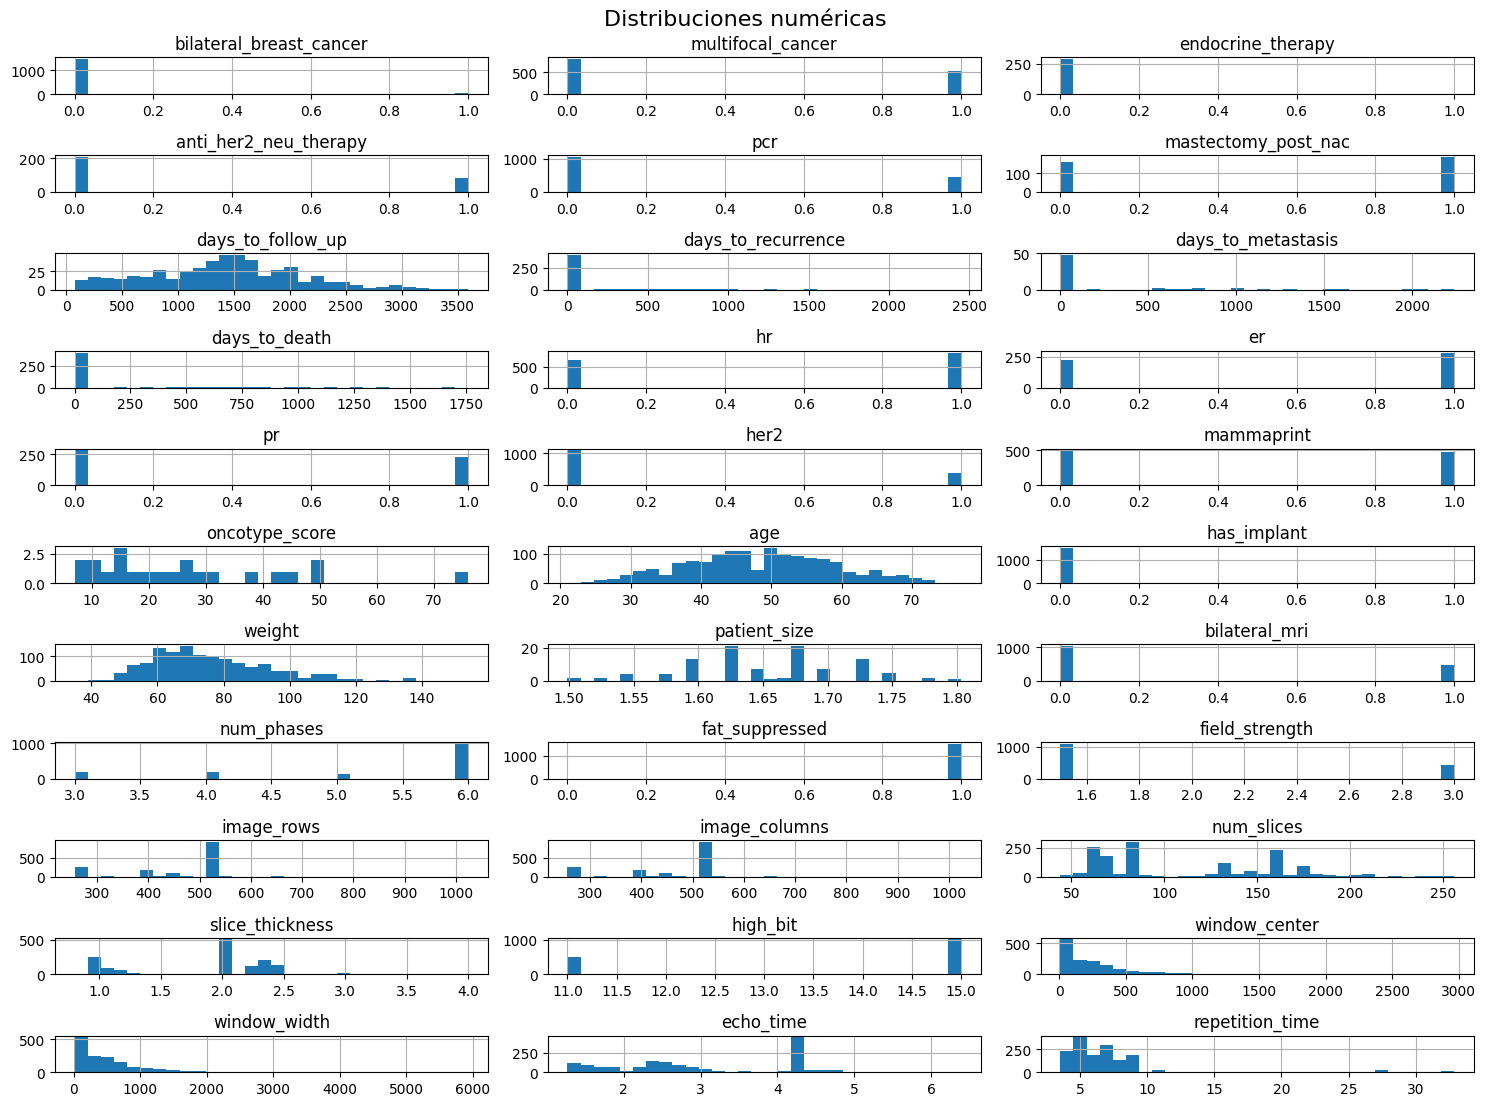

In [ ]:
# === 7. Histogramas para num√©ricas ===
df[num_cols].hist(bins=30, figsize=(15, 12), layout=(len(num_cols) // 3 + 1, 3))
plt.suptitle("Distribuciones num√©ricas", fontsize=16)
plt.tight_layout()
plt.show()


### üìä An√°lisis de Distribuciones Num√©ricas

El histograma general de las variables num√©ricas del dataset MAMA-MIA revela varios aspectos clave para el an√°lisis posterior:

- **Variables binarias (0 o 1):** Muchas variables como `pcr`, `anti_her2_neu_therapy`, `hr`, `er`, `pr`, `mastectomy_post_nac` o `has_implant` son binarias y presentan una **distribuci√≥n altamente desbalanceada**. Por ejemplo, la mayor√≠a de los pacientes no tienen implantes y no lograron una respuesta patol√≥gica completa (`pcr = 0`). Este desequilibrio debe tenerse en cuenta en el modelado, utilizando m√©tricas apropiadas (como F1-score o AUC) y, si fuera necesario, t√©cnicas de balanceo como SMOTE.

- **Variables cl√≠nicas continuas:** Variables como `age`, `weight`, y `patient_size` muestran distribuciones esperadas en poblaci√≥n adulta. `age` tiene forma aproximadamente normal, con mayor frecuencia en mujeres de entre 45 y 55 a√±os. `weight` tambi√©n tiene un patr√≥n sim√©trico, sin valores at√≠picos evidentes.

- **Variables de seguimiento:** Los histogramas de `days_to_follow_up`, `days_to_recurrence`, `days_to_death` y `days_to_metastasis` est√°n muy sesgados hacia la izquierda, lo que indica que muchos pacientes no han experimentado estos eventos durante el tiempo de seguimiento. En algunos casos, el n√∫mero de ceros es muy alto, lo que sugiere considerar estas variables como categ√≥ricas o binarizadas ("evento s√≠/no").

- **Variables t√©cnicas de imagen:** Existen claras diferencias en los par√°metros de adquisici√≥n. Por ejemplo:
  - `field_strength` muestra dos picos principales correspondientes a **1.5T** y **3T**, lo que evidencia heterogeneidad entre esc√°neres.
  - `num_phases` var√≠a entre 3 y 6, lo que puede reflejar diferentes protocolos DCE-MRI entre centros.
  - `image_rows`, `image_columns`, `slice_thickness` y otros par√°metros muestran amplia variabilidad t√©cnica.

Esta variabilidad es cr√≠tica para evaluar la **robustez y generalizaci√≥n** de los modelos basados en imagen. Los algoritmos de deep learning deben ser capaces de manejar estas diferencias para garantizar un rendimiento cl√≠nicamente fiable.



C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2601337381.py:25: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\FX507\Documents\GitHub\Mama_Mia\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


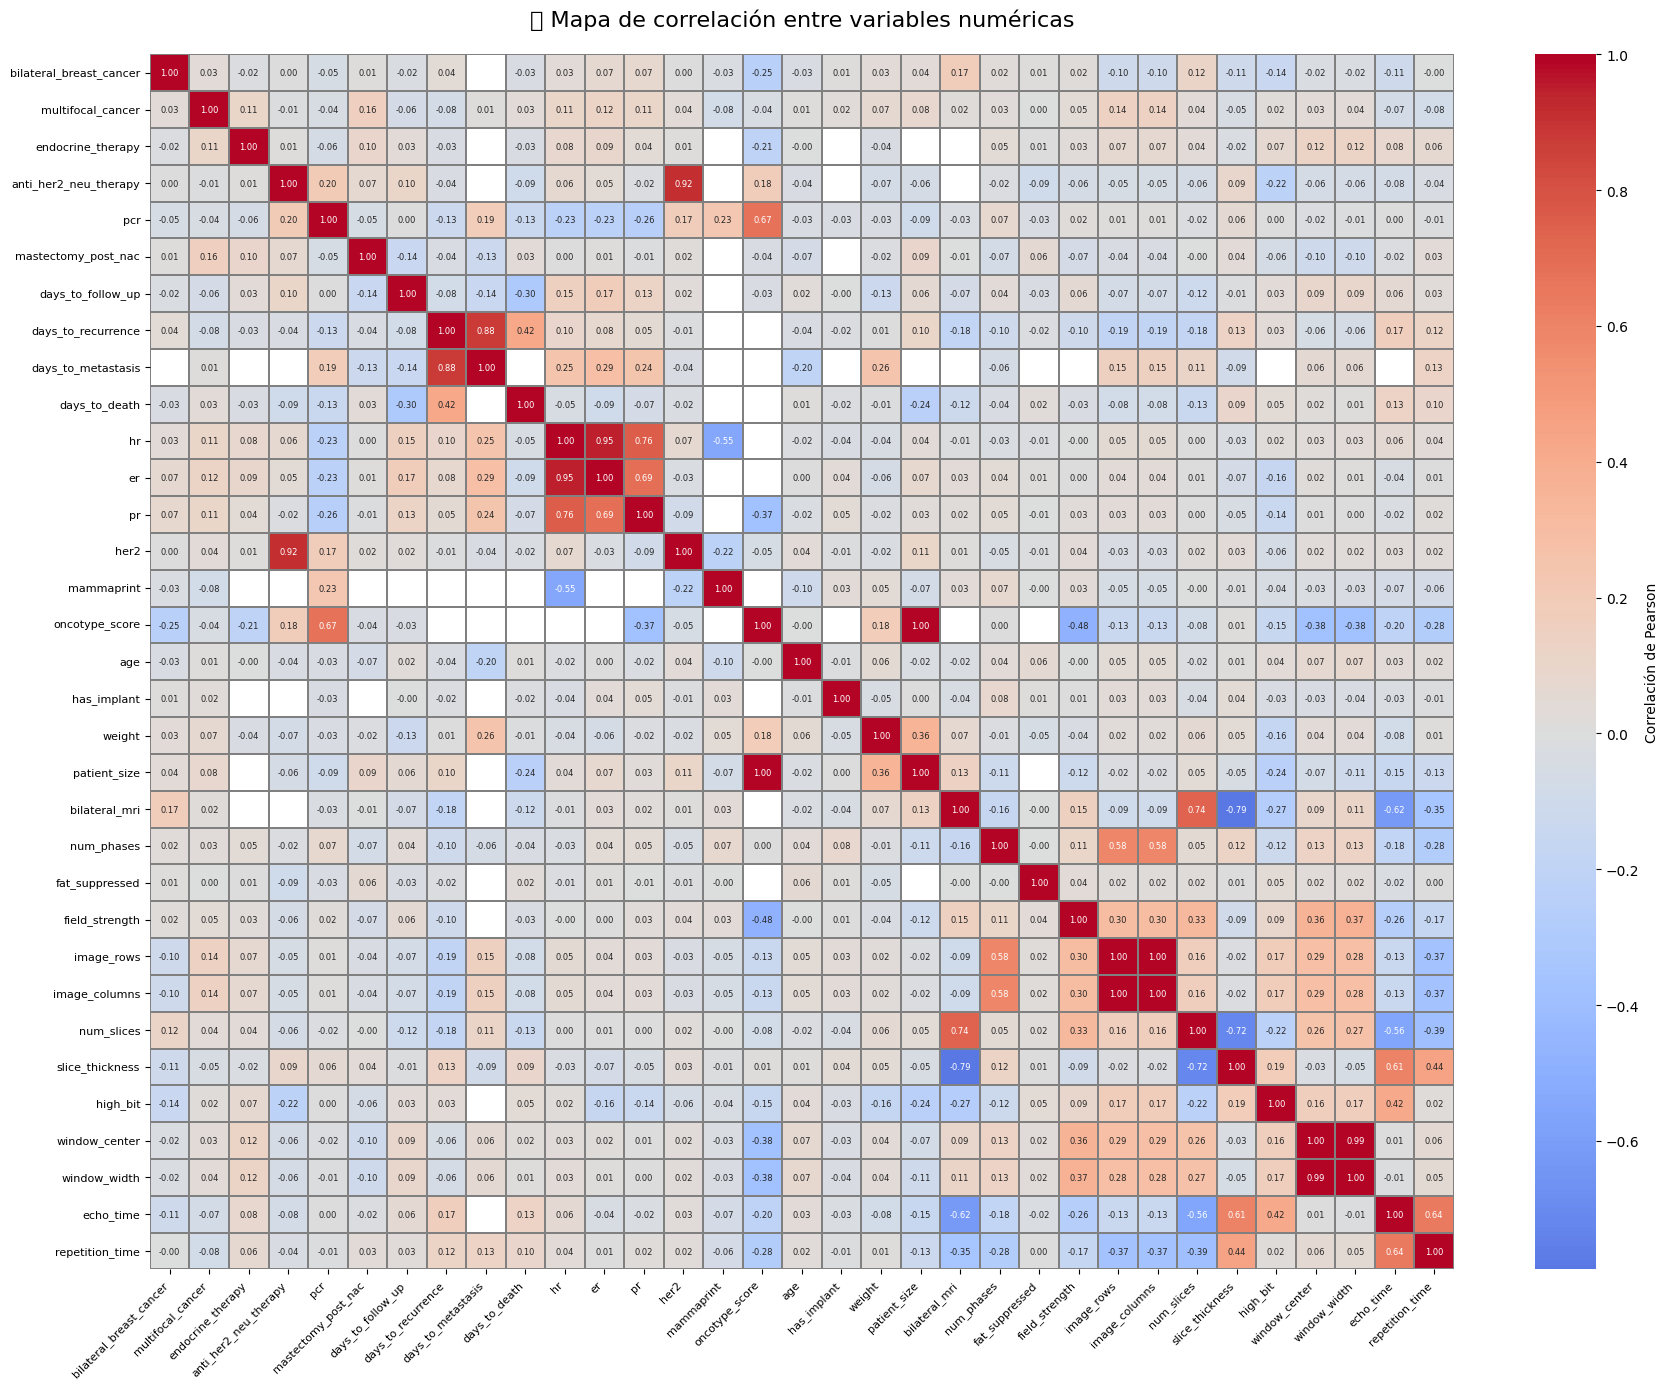

In [ ]:
# === 7. Heatmap de correlaciones ===
import matplotlib.pyplot as plt
import seaborn as sns

# Selecci√≥n de solo columnas num√©ricas
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

# Crear heatmap mejorado
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    annot_kws={"size": 6},
    linewidths=0.3,
    linecolor="gray",
    cbar_kws={"label": "Correlaci√≥n de Pearson"}
)
plt.title("üî• Mapa de correlaci√≥n entre variables num√©ricas", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


### üî• Mapa de correlaci√≥n entre variables num√©ricas

El heatmap revela correlaciones relevantes entre algunas variables cl√≠nicas y t√©cnicas:

- Existe una alta correlaci√≥n entre los biomarcadores hormonales `er`, `pr` y `hr`, como es esperable.
- Variables t√©cnicas como `window_width`, `window_center` o `slice_thickness` tambi√©n presentan correlaciones altas entre s√≠.
- Muchas de las variables cl√≠nicas (`age`, `weight`, `pcr`, etc.) est√°n poco correlacionadas entre s√≠, lo que es deseable al aportar informaci√≥n no redundante al modelo.

Este an√°lisis ayuda a evitar la multicolinealidad en el modelado y seleccionar features de forma informada.


# Analizamos variable objetivo

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


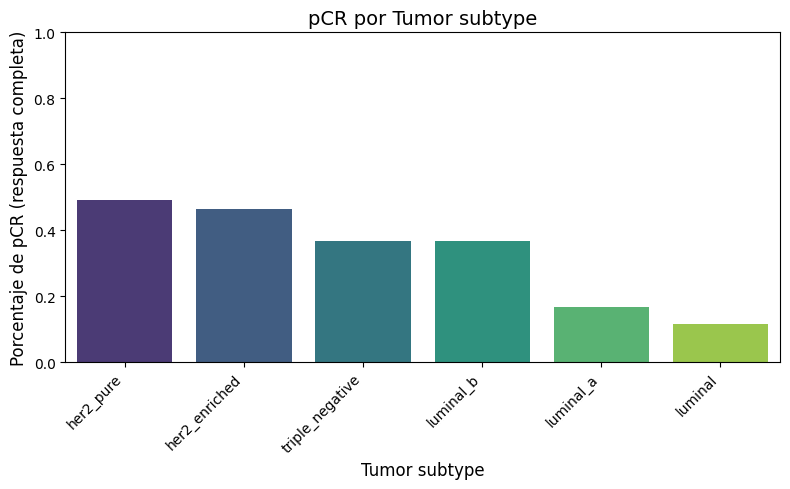

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')
C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2414381378.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


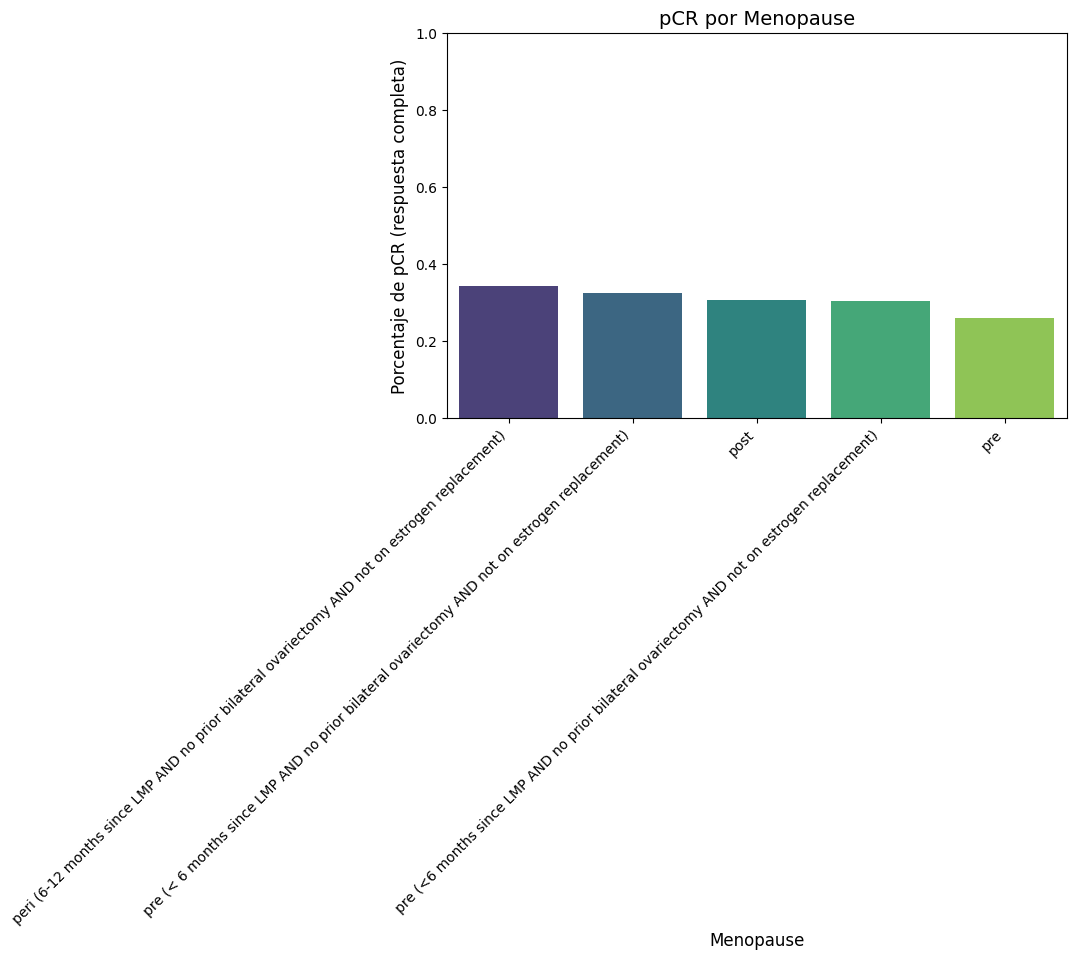

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


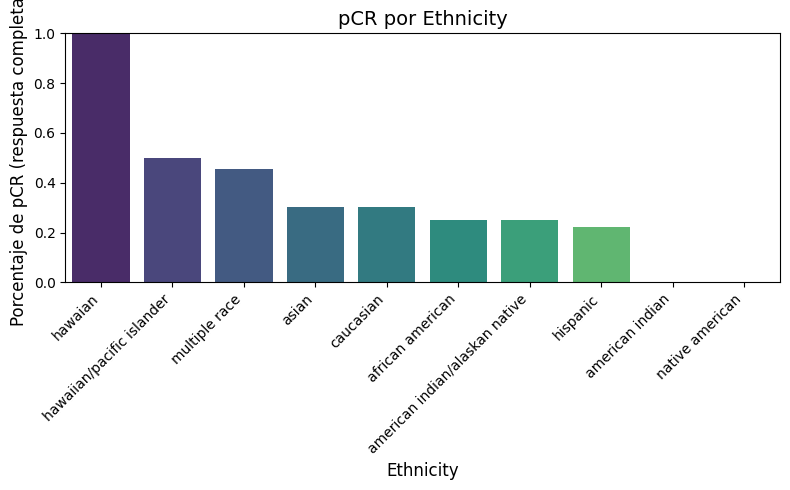

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


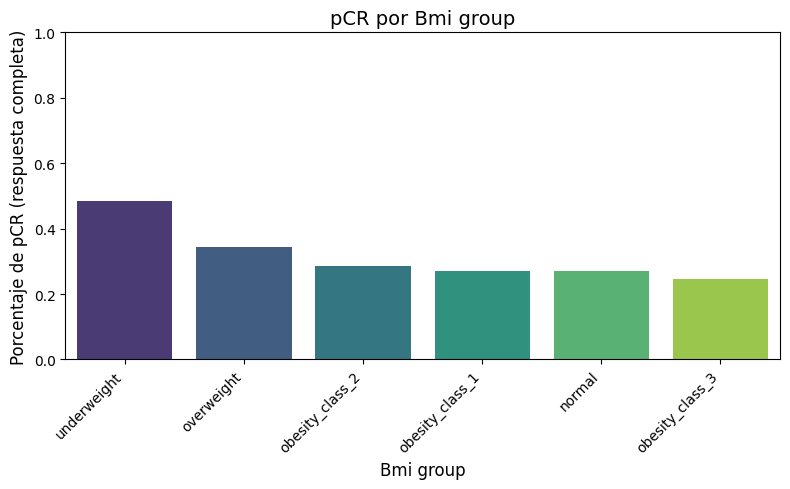

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2414381378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pct.index, y=pct.values, palette='viridis')


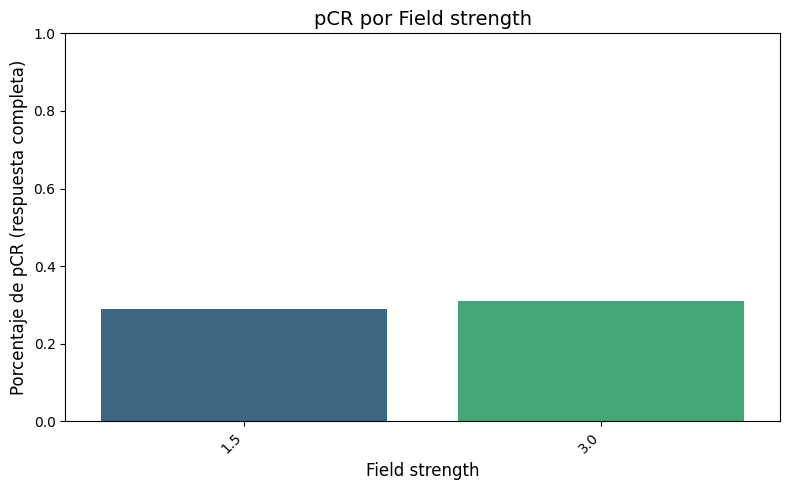

In [ ]:
# Variables categ√≥ricas a comparar con 'pcr'
cat_vars = ['tumor_subtype', 'menopause', 'ethnicity', 'bmi_group', 'field_strength']

# Crear una gr√°fica para cada variable categ√≥rica vs pcr (porcentaje de respuesta)
for var in cat_vars:
    plt.figure(figsize=(8, 5))
    # Calcular porcentaje de pacientes con pcr=1 por categor√≠a
    pct = df.groupby(var)['pcr'].mean().sort_values(ascending=False)
    
    # Crear barplot
    sns.barplot(x=pct.index, y=pct.values, palette='viridis')
    plt.ylabel("Porcentaje de pCR (respuesta completa)", fontsize=12)
    plt.xlabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.title(f"pCR por {var.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


### üéØ An√°lisis de pCR seg√∫n variables cl√≠nicas y t√©cnicas

Se analizaron las tasas de respuesta patol√≥gica completa (pCR) por diferentes subgrupos cl√≠nicos y t√©cnicos del dataset.

- **Subtipo tumoral:** Los subtipos `her2_pure`, `her2_enriched` y `triple_negative` presentaron las mayores tasas de pCR (>45%), en l√≠nea con evidencia m√©dica que los asocia a mayor sensibilidad a quimioterapia. En cambio, los subtipos luminales (`luminal_a`, `luminal`) tuvieron tasas mucho menores (<20%).

- **Menopausia:** Las pacientes premenop√°usicas mostraron una leve tendencia a mejores respuestas, aunque las diferencias entre grupos fueron menores.

- **Etnia:** Se observaron diferencias notables, con las pacientes `hawaiian` y `pacific islander` mostrando tasas muy altas de pCR. No obstante, este resultado puede estar influido por un n√∫mero reducido de muestras en dichos grupos, lo que requiere validaci√≥n estad√≠stica.

- **IMC (BMI group):** Las pacientes con menor peso (`underweight`) mostraron mayores tasas de pCR, mientras que la obesidad se asoci√≥ con menor probabilidad de respuesta completa.

- **Fuerza del campo magn√©tico (field strength):** Aunque la diferencia fue peque√±a, los esc√°neres de 3T tendieron a estar asociados a una mayor tasa de pCR, posiblemente por mayor calidad de imagen y detecci√≥n m√°s precisa.

Este an√°lisis es crucial para detectar posibles **factores de confusi√≥n** y dise√±ar un modelo que sea justo y robusto ante la heterogeneidad de la poblaci√≥n.


C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\378612962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pcr', y=var, data=df, palette='Set2')


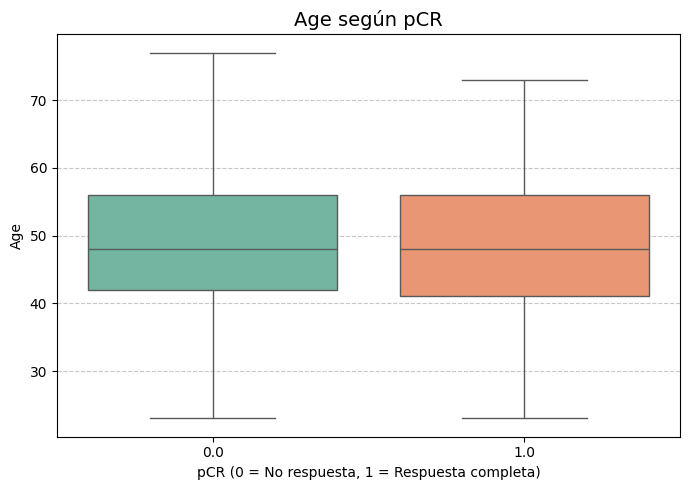

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\378612962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pcr', y=var, data=df, palette='Set2')


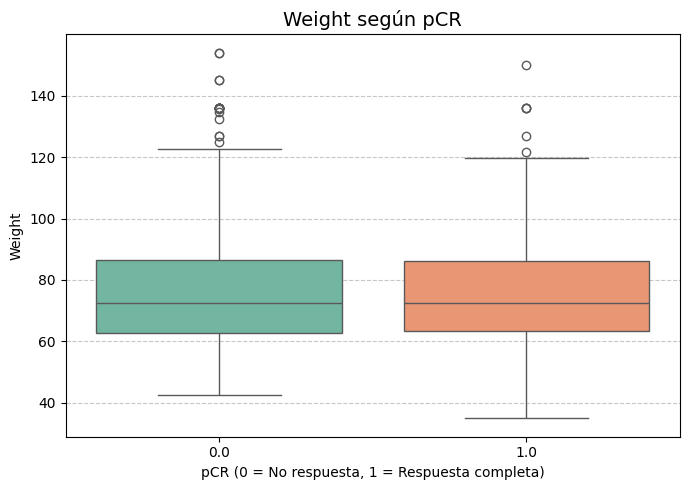

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\378612962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pcr', y=var, data=df, palette='Set2')


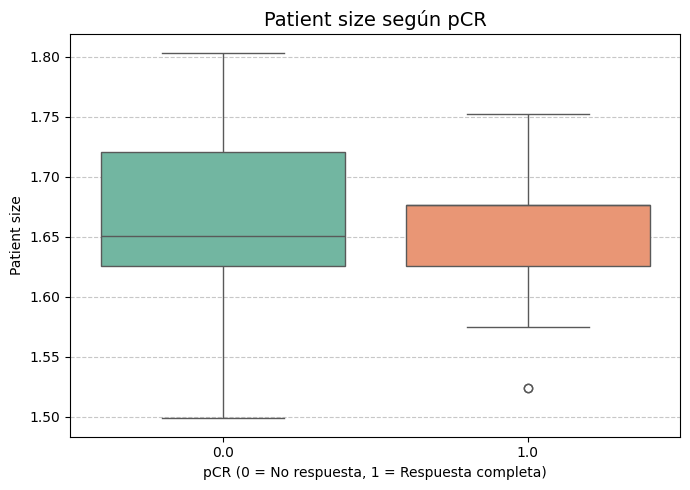

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\378612962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pcr', y=var, data=df, palette='Set2')


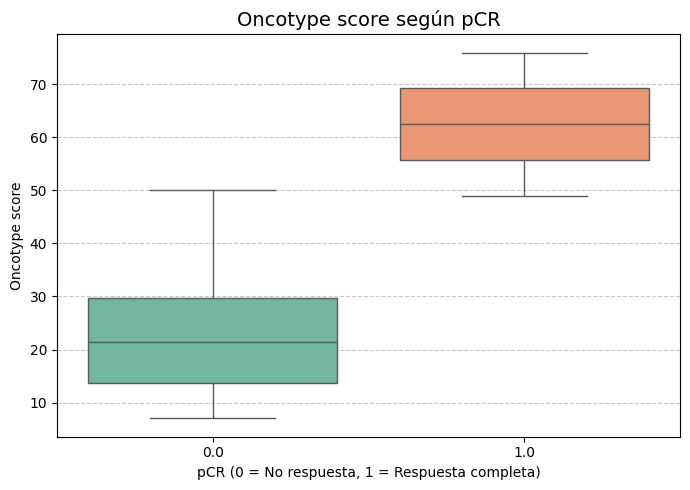

In [ ]:
# Variables num√©ricas a analizar contra pcr
num_vars = ['age', 'weight', 'patient_size', 'oncotype_score']

# Crear boxplot por cada variable num√©rica vs pcr
for var in num_vars:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='pcr', y=var, data=df, palette='Set2')
    plt.title(f'{var.replace("_", " ").capitalize()} seg√∫n pCR', fontsize=14)
    plt.xlabel('pCR (0 = No respuesta, 1 = Respuesta completa)')
    plt.ylabel(var.replace('_', ' ').capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### üì¶ Comparaci√≥n de variables num√©ricas seg√∫n respuesta patol√≥gica completa (pCR)

Se realiz√≥ un an√°lisis mediante diagramas de caja (boxplots) para explorar posibles diferencias en variables num√©ricas clave entre pacientes que lograron respuesta patol√≥gica completa (`pcr = 1`) y aquellas que no (`pcr = 0`).

- **Edad (`age`)**: Las pacientes con pCR tendieron a ser ligeramente m√°s j√≥venes que aquellas sin respuesta, aunque la diferencia no es extrema. Esto puede estar en l√≠nea con estudios previos que asocian edad temprana con mayor eficacia de la quimioterapia neoadyuvante.

- **Peso (`weight`)**: Se observa una leve tendencia a mayor peso entre las pacientes que no lograron respuesta completa, lo que sugiere que el √≠ndice de masa corporal podr√≠a tener un efecto negativo en la eficacia del tratamiento. Sin embargo, la diferencia no es concluyente sin an√°lisis estad√≠stico adicional.

- **Talla del paciente (`patient_size`)**: No se observan diferencias significativas entre los grupos. La estatura parece no tener una relaci√≥n directa con la probabilidad de pCR.

- **Puntuaci√≥n gen√≥mica (`oncotype_score`)**: Aunque esta variable presenta un n√∫mero considerable de valores nulos, se aprecia una tendencia a puntuaciones m√°s bajas en el grupo con pCR. Este resultado debe interpretarse con cautela y evaluarse solo en casos con informaci√≥n completa.

Este an√°lisis permite identificar variables num√©ricas con posible valor predictivo para modelos supervisados, y tambi√©n evidencia la necesidad de imputar o filtrar variables incompletas como `oncotype_score`.


C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2145810847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pcr_rate.index, y=pcr_rate.values, palette='coolwarm')


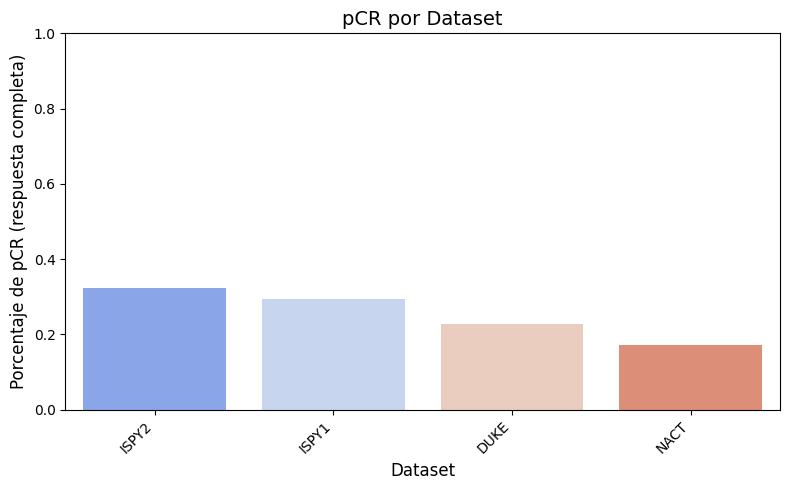

C:\Users\FX507\AppData\Local\Temp\ipykernel_34220\2145810847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pcr_rate.index, y=pcr_rate.values, palette='coolwarm')


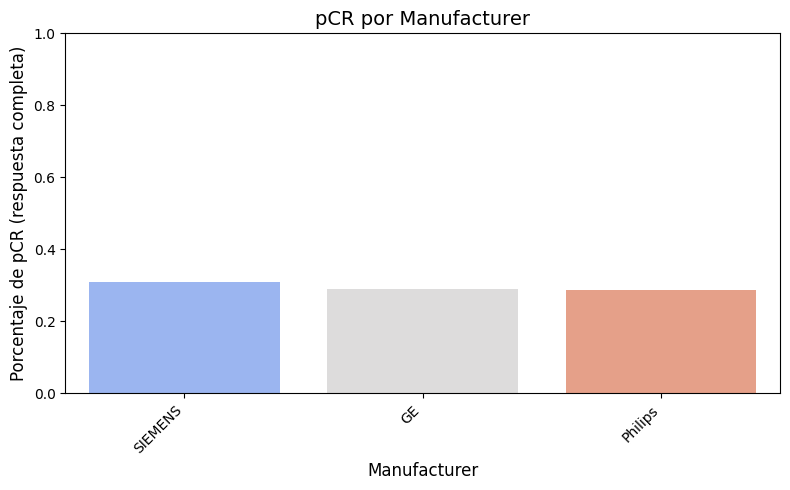

In [ ]:
# Variables categ√≥ricas relacionadas con el origen del dato o protocolo
protocolo_vars = ['dataset', 'manufacturer']

# Crear barplots para comparar tasas de pCR entre categor√≠as t√©cnicas
for var in protocolo_vars:
    plt.figure(figsize=(8, 5))
    pcr_rate = df.groupby(var)['pcr'].mean().sort_values(ascending=False)
    
    sns.barplot(x=pcr_rate.index, y=pcr_rate.values, palette='coolwarm')
    plt.ylabel("Porcentaje de pCR (respuesta completa)", fontsize=12)
    plt.xlabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.title(f"pCR por {var.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


### üåê An√°lisis de pCR seg√∫n Dataset y Fabricante del Esc√°ner

Se evalu√≥ la tasa de respuesta patol√≥gica completa (`pcr`) seg√∫n dos variables clave del origen de los datos: el dataset y el fabricante del esc√°ner (`manufacturer`). Estas comparaciones permiten identificar posibles **fuentes de sesgo** o **factores t√©cnicos** que puedan influir en el rendimiento de los modelos.

---

#### üìÅ Dataset

Los datasets `ISPY1` e `ISPY2` presentan las mayores tasas de respuesta completa, con valores superiores al 30%. En cambio, `DUKE` y especialmente `NACT` muestran tasas considerablemente m√°s bajas. Estas diferencias podr√≠an estar relacionadas con:

- Variaciones en la poblaci√≥n incluida (edad, subtipo tumoral, tratamientos).
- Distintos protocolos de adquisici√≥n o anotaci√≥n de tumores.
- Posibles criterios de inclusi√≥n/exclusi√≥n m√°s exigentes en ISPY.

**Importancia:** el modelo puede aprender patrones que funcionan bien en `ISPY2` pero generalicen peor en otros centros si no se controla adecuadamente esta variabilidad.

---

#### üè≠ Fabricante del esc√°ner

Contrario a lo que se podr√≠a suponer, los esc√°neres **SIEMENS** mostraron una **mayor tasa de pCR** en comparaci√≥n con **GE** y **Philips**, aunque la diferencia entre fabricantes es m√°s moderada que entre datasets.

Este resultado puede estar influenciado por:
- El hecho de que SIEMENS est√© m√°s representado en los datasets ISPY.
- Diferencias t√©cnicas entre esc√°neres, como la fuerza del campo magn√©tico, la calidad de imagen o el software de reconstrucci√≥n.

**Importancia:** se recomienda comprobar que los modelos segmentadores y clasificadores mantengan su rendimiento al aplicarse sobre datos adquiridos con diferentes fabricantes.

---

Este an√°lisis es clave para dise√±ar un modelo que no solo sea preciso, sino tambi√©n **justo y generalizable**. Se sugiere realizar validaciones estratificadas por `dataset` y `manufacturer` durante la fase de evaluaci√≥n.


# Conclusiones

El EDA del dataset MAMA-MIA ha permitido obtener una visi√≥n profunda tanto de los aspectos cl√≠nicos como t√©cnicos del conjunto de datos. Se destacan los siguientes puntos:

- La variable `pcr` (respuesta patol√≥gica completa) presenta un notable desbalance, con un n√∫mero mucho mayor de pacientes que no logran una respuesta completa. Esto tendr√° implicaciones importantes en la elecci√≥n de m√©tricas y t√©cnicas de modelado.

- Variables cl√≠nicas como el subtipo tumoral, la edad, el estado menop√°usico y el √≠ndice de masa corporal muestran asociaci√≥n con `pcr`, y por tanto, son candidatas a incluirse como predictores.

- El an√°lisis t√©cnico revela variaciones significativas entre datasets, fabricantes de esc√°ner y fuerza del campo magn√©tico, lo cual puede introducir sesgos si no se controla adecuadamente. Se recomienda aplicar t√©cnicas de validaci√≥n estratificada o por centro para garantizar la generalizaci√≥n.

- No se detectaron valores extremos relevantes ni errores evidentes en las variables num√©ricas. Algunas variables, como `oncotype_score`, presentan una alta tasa de valores nulos y deber√°n tratarse con t√©cnicas de imputaci√≥n o exclusi√≥n seg√∫n el caso.

Este EDA constituye la base para construir un modelo de segmentaci√≥n y/o predicci√≥n cl√≠nicamente robusto, justo y reproducible.
